In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving flights.csv to flights.csv


In [ ]:
data=pd.read_csv("flights.csv")
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [ ]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
id,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
year,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
month,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
day,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30
dep_time,517.0,533.0,542.0,544.0,554.0,554.0,555.0,557.0,557.0,558.0,...,2240.0,2241.0,2307.0,2349.0,NaN,NaN,NaN,NaN,NaN,NaN
sched_dep_time,515,529,540,545,600,558,600,600,600,600,...,2250,2246,2255,2359,1842,1455,2200,1210,1159,840
dep_delay,2.0,4.0,2.0,-1.0,-6.0,-4.0,-5.0,-3.0,-3.0,-2.0,...,-10.0,-5.0,12.0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN
arr_time,830.0,850.0,923.0,1004.0,812.0,740.0,913.0,709.0,838.0,753.0,...,2347.0,2345.0,2359.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN
sched_arr_time,819,830,850,1022,837,728,854,723,846,745,...,7,1,2358,350,2019,1634,2312,1330,1344,1020
arr_delay,11.0,20.0,33.0,-18.0,-25.0,12.0,19.0,-14.0,-8.0,8.0,...,-20.0,-16.0,1.0,-25.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [ ]:
data.nunique()

id                336776
year                   1
month                 12
day                   31
dep_time            1318
sched_dep_time      1021
dep_delay            527
arr_time            1411
sched_arr_time      1163
arr_delay            577
carrier               16
flight              3844
tailnum             4043
origin                 3
dest                 105
air_time             509
distance             214
hour                  20
minute                60
time_hour           6936
name                  16
dtype: int64

In [ ]:
data.shape

(336776, 21)

In [ ]:
data.dtypes

id                  int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
name               object
dtype: object

In [ ]:
#data["time_hour"]=pd.to_datetime(data["time_hour"], format = '%Y-%m-%d')

In [ ]:
data.dtypes

id                  int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
origin             object
dest               object
air_time          float64
distance            int64
time_hour          object
name               object
dtype: object

In [ ]:
data.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [ ]:
data.describe(exclude=[np.number])

<ipython-input-32-5d7cc4604655>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude=[np.number])


,carrier,tailnum,origin,dest,time_hour,name
count,336776,334264,336776,336776,336776,336776
unique,16,4043,3,105,6936,16
top,UA,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,58665,575,120835,17283,94,58665
first,NaN,NaN,NaN,NaN,2013-01-01 05:00:00,NaN
last,NaN,NaN,NaN,NaN,2013-12-31 23:00:00,NaN


In [ ]:
data.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [ ]:
try:
   data=data.drop(['tailnum','year','month','day','hour','minute'],axis=1)
except:
  print("delete some columns")
data.T

,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
id,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
dep_time,517.0,533.0,542.0,544.0,554.0,554.0,555.0,557.0,557.0,558.0,...,2240.0,2241.0,2307.0,2349.0,NaN,NaN,NaN,NaN,NaN,NaN
sched_dep_time,515,529,540,545,600,558,600,600,600,600,...,2250,2246,2255,2359,1842,1455,2200,1210,1159,840
dep_delay,2.0,4.0,2.0,-1.0,-6.0,-4.0,-5.0,-3.0,-3.0,-2.0,...,-10.0,-5.0,12.0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN
arr_time,830.0,850.0,923.0,1004.0,812.0,740.0,913.0,709.0,838.0,753.0,...,2347.0,2345.0,2359.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN
sched_arr_time,819,830,850,1022,837,728,854,723,846,745,...,7,1,2358,350,2019,1634,2312,1330,1344,1020
arr_delay,11.0,20.0,33.0,-18.0,-25.0,12.0,19.0,-14.0,-8.0,8.0,...,-20.0,-16.0,1.0,-25.0,NaN,NaN,NaN,NaN,NaN,NaN
carrier,UA,UA,AA,B6,DL,UA,B6,EV,B6,AA,...,B6,B6,B6,B6,EV,9E,9E,MQ,MQ,MQ
flight,1545,1714,1141,725,461,1696,507,5708,79,301,...,2002,486,718,745,5274,3393,3525,3461,3572,3531
origin,EWR,LGA,JFK,JFK,LGA,EWR,EWR,LGA,JFK,LGA,...,JFK,JFK,JFK,JFK,LGA,JFK,LGA,LGA,LGA,LGA


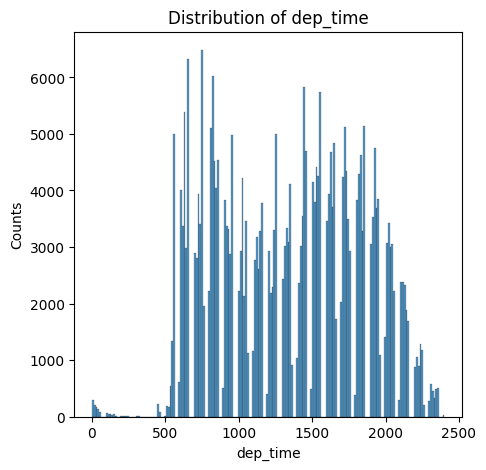

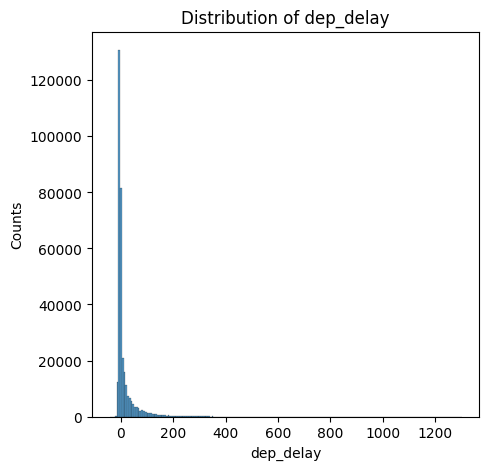

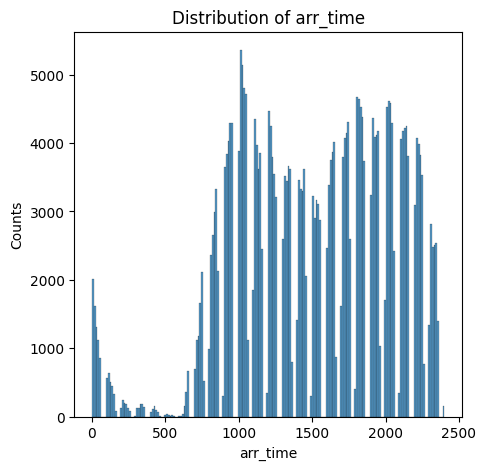

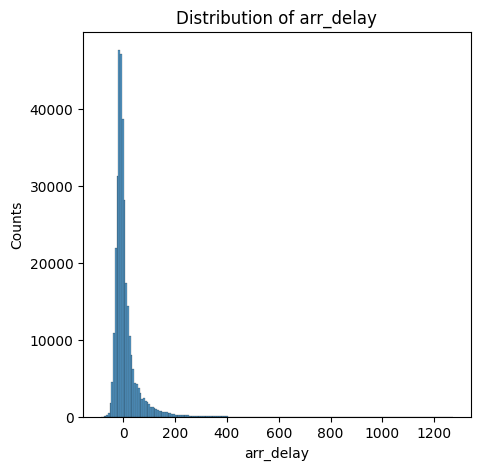

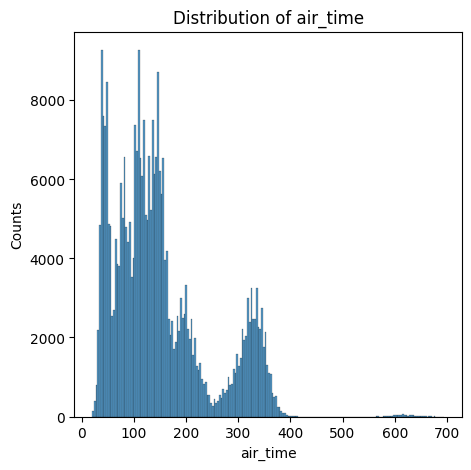

In [ ]:
numerical_columns1 = [ 'dep_time','dep_delay' ,'arr_time','arr_delay' , 'air_time']
for column  in numerical_columns1:
    plt.figure(figsize=(5,5))
    sns.histplot(data=data , x=column , bins=200)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Distribution of {column}')

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
numerical_columns = [ 'dep_time','dep_delay' ,'arr_time','arr_delay' , 'air_time']

In [ ]:
imputer=KNNImputer(n_neighbors=5)
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [ ]:
print(data[numerical_columns].head())

   dep_time  dep_delay  arr_time  arr_delay  air_time
0     517.0        2.0     830.0       11.0     227.0
1     533.0        4.0     850.0       20.0     227.0
2     542.0        2.0     923.0       33.0     160.0
3     544.0       -1.0    1004.0      -18.0     183.0
4     554.0       -6.0     812.0      -25.0     116.0


In [ ]:
print(data[numerical_columns].tail())

           dep_time  dep_delay     arr_time  arr_delay   air_time
336771  1349.109947   12.63907  1502.054999   6.895377  150.68646
336772  1349.109947   12.63907  1502.054999   6.895377  150.68646
336773  1349.109947   12.63907  1502.054999   6.895377  150.68646
336774  1349.109947   12.63907  1502.054999   6.895377  150.68646
336775  1349.109947   12.63907  1502.054999   6.895377  150.68646


In [ ]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
id,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
dep_time,517.0,533.0,542.0,544.0,554.0,554.0,555.0,557.0,557.0,558.0,...,2240.0,2241.0,2307.0,2349.0,1349.109947,1349.109947,1349.109947,1349.109947,1349.109947,1349.109947
sched_dep_time,515,529,540,545,600,558,600,600,600,600,...,2250,2246,2255,2359,1842,1455,2200,1210,1159,840
dep_delay,2.0,4.0,2.0,-1.0,-6.0,-4.0,-5.0,-3.0,-3.0,-2.0,...,-10.0,-5.0,12.0,-10.0,12.63907,12.63907,12.63907,12.63907,12.63907,12.63907
arr_time,830.0,850.0,923.0,1004.0,812.0,740.0,913.0,709.0,838.0,753.0,...,2347.0,2345.0,2359.0,325.0,1502.054999,1502.054999,1502.054999,1502.054999,1502.054999,1502.054999
sched_arr_time,819,830,850,1022,837,728,854,723,846,745,...,7,1,2358,350,2019,1634,2312,1330,1344,1020
arr_delay,11.0,20.0,33.0,-18.0,-25.0,12.0,19.0,-14.0,-8.0,8.0,...,-20.0,-16.0,1.0,-25.0,6.895377,6.895377,6.895377,6.895377,6.895377,6.895377
carrier,UA,UA,AA,B6,DL,UA,B6,EV,B6,AA,...,B6,B6,B6,B6,EV,9E,9E,MQ,MQ,MQ
flight,1545,1714,1141,725,461,1696,507,5708,79,301,...,2002,486,718,745,5274,3393,3525,3461,3572,3531
origin,EWR,LGA,JFK,JFK,LGA,EWR,EWR,LGA,JFK,LGA,...,JFK,JFK,JFK,JFK,LGA,JFK,LGA,LGA,LGA,LGA


In [ ]:
data.isnull().sum()

id                0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
origin            0
dest              0
air_time          0
distance          0
time_hour         0
name              0
dtype: int64

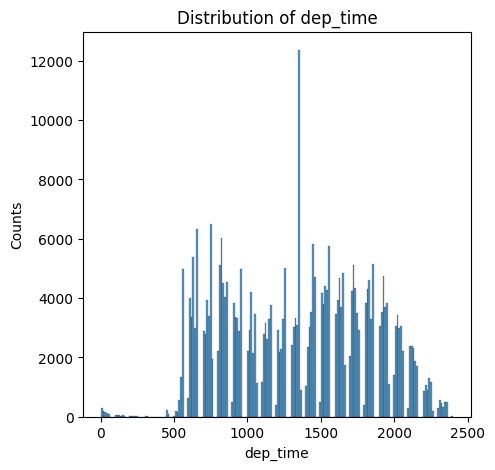

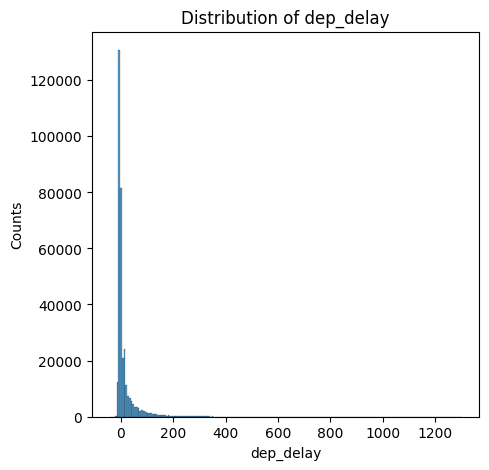

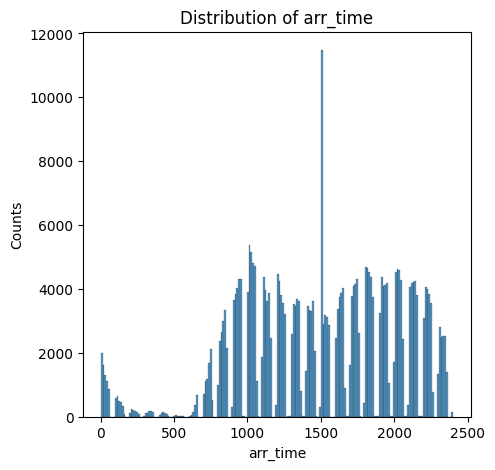

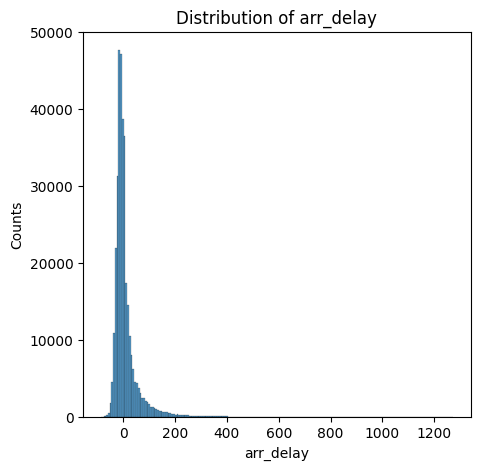

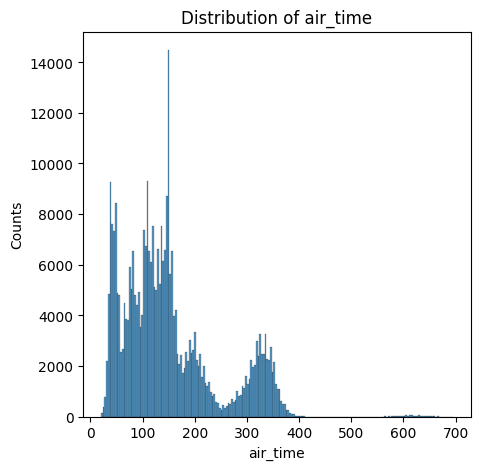

In [ ]:
numerical_columns = [ 'dep_time','dep_delay' ,'arr_time','arr_delay' , 'air_time']
for column  in numerical_columns:
    plt.figure(figsize=(5,5))
    sns.histplot(data=data , x=column , bins=200)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Distribution of {column}')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_name=LabelEncoder()
le_carrier = LabelEncoder()
le_origin = LabelEncoder()
le_dest = LabelEncoder()
le_time_hour = LabelEncoder()

# fit and transform each categorical column using its corresponding LabelEncoder
data['name'] = le_carrier.fit_transform(data['name'])
data['carrier'] = le_carrier.fit_transform(data['carrier'])
data['origin'] = le_origin.fit_transform(data['origin'])
data['dest'] = le_dest.fit_transform(data['dest'])
data['time_hour'] = le_time_hour.fit_transform(data['time_hour'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
data= ss.fit_transform(data)
data

array([[-1.73204566e+00, -1.72543993e+00, -1.77443318e+00, ...,
         4.91096165e-01, -1.74605398e+00,  1.46169781e+00],
       [-1.73203538e+00, -1.69226278e+00, -1.74447609e+00, ...,
         5.12917364e-01, -1.74605398e+00,  1.46169781e+00],
       [-1.73202509e+00, -1.67360063e+00, -1.72093837e+00, ...,
         6.69466145e-02, -1.74605398e+00, -1.27960039e+00],
       ...,
       [ 1.73202509e+00,  1.77372474e-16, -2.87277482e-01, ...,
        -3.76296485e-01,  1.65701378e+00, -5.94275842e-01],
       [ 1.73203538e+00,  1.77372474e-16, -3.96406893e-01, ...,
        -8.46816083e-01,  1.65651266e+00, -5.94275842e-01],
       [ 1.73204566e+00,  1.77372474e-16, -1.07900066e+00, ...,
        -8.30450184e-01,  1.66453049e+00, -5.94275842e-01]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
data

array([[0.00000000e+00, 2.15089621e-01, 1.81535730e-01, ...,
        2.78493758e-01, 2.01874549e-03, 9.33333333e-01],
       [2.96934155e-06, 2.21759066e-01, 1.87749667e-01, ...,
        2.81715667e-01, 2.01874549e-03, 9.33333333e-01],
       [5.93868310e-06, 2.25510629e-01, 1.92632046e-01, ...,
        2.15867902e-01, 2.01874549e-03, 1.33333333e-01],
       ...,
       [9.99994061e-01, 5.61946622e-01, 4.90013316e-01, ...,
        1.50422876e-01, 9.81254506e-01, 3.33333333e-01],
       [9.99997031e-01, 5.61946622e-01, 4.67376831e-01, ...,
        8.09504631e-02, 9.81110310e-01, 3.33333333e-01],
       [1.00000000e+00, 5.61946622e-01, 3.25787838e-01, ...,
        8.33668949e-02, 9.83417448e-01, 3.33333333e-01]])

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
data = norm.fit_transform(data)
data

array([[0.00000000e+00, 1.48086205e-01, 1.24984819e-01, ...,
        1.91739069e-01, 1.38987812e-03, 6.42586986e-01],
       [1.67717600e-06, 1.25256384e-01, 1.06046822e-01, ...,
        1.59121727e-01, 1.14024993e-03, 5.27175551e-01],
       [5.75470722e-06, 2.18524482e-01, 1.86664452e-01, ...,
        2.09180479e-01, 1.95620630e-03, 1.29202768e-01],
       ...,
       [4.49895660e-01, 2.52818848e-01, 2.20456173e-01, ...,
        6.76750008e-02, 4.41464765e-01, 1.49966111e-01],
       [4.49215019e-01, 2.52435612e-01, 2.09953315e-01, ...,
        3.63642718e-02, 4.40730795e-01, 1.49738784e-01],
       [4.36292563e-01, 2.45173132e-01, 1.42138811e-01, ...,
        3.63723563e-02, 4.29057719e-01, 1.45430854e-01]])